In [117]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from scipy.stats import rankdata
sys.path.append('../..')
#from nonlinear_significance.scripts import

from simulations_util import *

## Sensitivity to RF hyperparameters

In [104]:
# Load Results 
results_ccle_prot = pd.read_csv("results/ccle_linear_dgp_sensitivity/varying_heritability_sample_row_n/seed331/results.csv")

In [107]:
def produce_boxplot(results_dict,sample_row_n = 200,heritability = 0.2,fi_method = 'MDI',min_samples_leaf = 1):
    vars_ = results_dict['var']
    results_dict = results_dict[results_dict['fi'] == fi_method]
    FI_min_samples_leaf = results_dict[results_dict['min_samples_leaf'] == min_samples_leaf]
    FI_min_samples_leaf_n_h = FI_min_samples_leaf[(FI_min_samples_leaf['sample_row_n_name'] == sample_row_n) 
                                               & (FI_min_samples_leaf['heritability_name'] == heritability)]
    FI_vars_ = []
    for var in vars_:
        FI_min_samples_leaf_n_h_var = FI_min_samples_leaf_n_h[FI_min_samples_leaf_n_h['var'] == var]
        FI_vars_.append(FI_min_samples_leaf_n_h_var['importance'].values)
        #FI_rank_.append(FI_min_samples_leaf_n_h_var['importance'].rank().values)
        
        #FI_vars_.append(FI_min_samples_leaf_n_h[FI_min_samples_leaf_n_h['var'] == var]['importance'])
    return FI_vars_
                               
    

In [144]:
def produce_ranking_boxplot(results_dict,sample_row_n = 200, heritability = 0.2, fi_method = 'MDI',min_samples_leaf = 1):
    FI_rank_ = []
    results_dict = results_dict[results_dict['fi'] == fi_method]
    for i in range(len(results_dict['rep'].unique())):
        FI_rank_.append(results_dict[(results_dict['rep'] == i) & (results_dict['sample_row_n_name'] == sample_row_n) & (results_dict['heritability_name'] == heritability) & 
            (results_dict['min_samples_leaf'] == min_samples_leaf)]['importance'].rank(ascending = False).values)
    return FI_rank_

In [170]:
MDI_results = [produce_ranking_boxplot(results_ccle_prot,sample_row_n = 200,heritability = 0.2,fi_method = 'MDI',min_samples_leaf = min_leaf) for min_leaf in [1,5,10,20]]
R2F_results = [produce_ranking_boxplot(results_ccle_prot,sample_row_n = 200,heritability = 0.2,fi_method = 'swR2F+_max',min_samples_leaf = min_leaf) for min_leaf in [1,5,10,20]] 


In [180]:
MDI_results[0][0]

array([47., 50., 13.,  4., 16., 30., 11.,  9., 35., 15., 17., 24., 12.,
        8., 20., 33., 29., 10., 18., 31., 32., 46., 39., 36., 45., 42.,
       23., 37., 28., 27., 48., 21.,  5.,  3., 49., 38., 26.,  1., 40.,
        6., 34., 22., 25., 43., 44., 41.,  7.,  2., 19., 14.])

<AxesSubplot:>

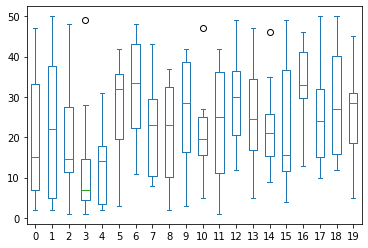

In [184]:
pd.DataFrame(MDI_results[0]).iloc[:,:20].plot(kind='box')

<AxesSubplot:>

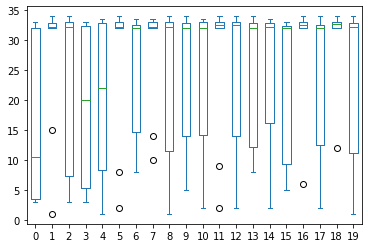

In [186]:
pd.DataFrame(MDI_results[3]).iloc[:,:20].plot(kind='box')

<AxesSubplot:>

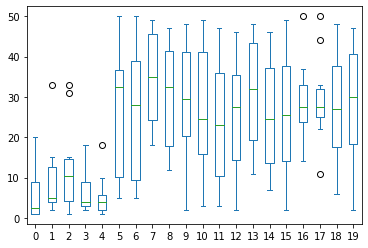

In [185]:
pd.DataFrame(R2F_results[0]).iloc[:,:20].plot(kind='box')

<AxesSubplot:>

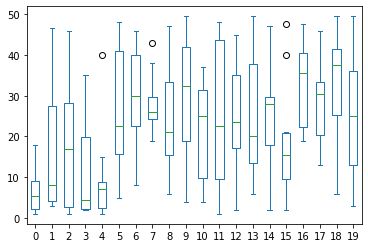

In [187]:
pd.DataFrame(R2F_results[3]).iloc[:,:20].plot(kind='box')

In [207]:
box['boxes'][0].set_facecolor("red")

# Plot MDI Results 

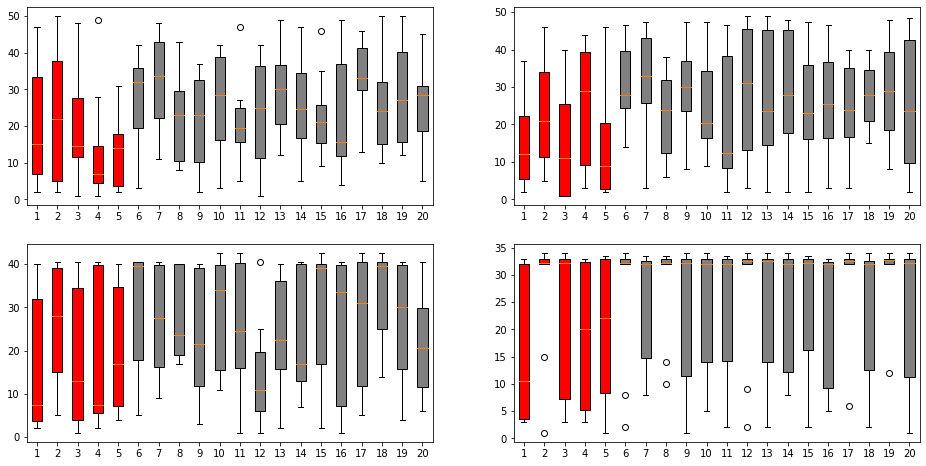

In [215]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
min_samples_leaf = [1,5,10,20]
for (i,ax) in enumerate(axs.reshape(-1)):
    box = ax.boxplot(pd.DataFrame(MDI_results[i]).iloc[:,:20],patch_artist=True); #ax.boxplot(MDI_results[i][:]);.plot(kind='box')
    counter = 0
    for (j,bar_plot) in enumerate(box['boxes']):
        if j <= 4:
            bar_plot.set_facecolor("red")
        else:
             bar_plot.set_facecolor("grey")
    #print(len(box['boxes']))
    #for _, line_list in box.items():
    #    for line in line_list:
    #        line.set_color('g')
    #ax.set_title("min_samples_leaf: " + str(min_samples_leaf[i]))
plt.show()

# Plot R2F+ Results

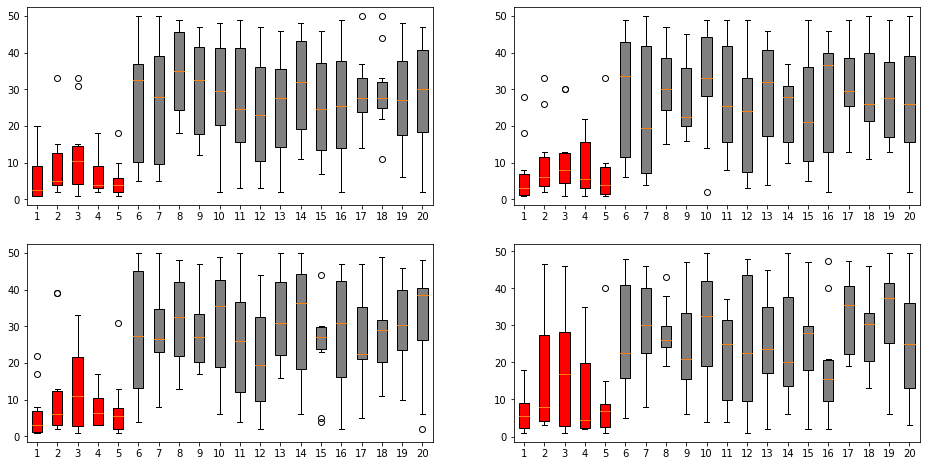

In [214]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
min_samples_leaf = [1,5,10,20]
for (i,ax) in enumerate(axs.reshape(-1)):
    box = ax.boxplot(pd.DataFrame(R2F_results[i]).iloc[:,:20],patch_artist=True); #ax.boxplot(MDI_results[i][:]);.plot(kind='box')
    for (j,bar_plot) in enumerate(box['boxes']):
        if j <= 4:
            bar_plot.set_facecolor("red")
        else:
             bar_plot.set_facecolor("grey")
    #ax.set_title("min_samples_leaf: " + str(min_samples_leaf[i]))
    #ax.set_ylabel("Feature Ran")
plt.show()